## Introduction

In this chapter, we'll begin looking into how we can do more with matplotlib than just simply creating a bunch of static visualizations. Specifically, in this lesson, we'll be looking into the built-in interactivity that matplotlib provides, and in addition, we'll also see how we can take advantage of matplotlib's event handling API to insert our own code into our chosen backend's event loop so we can achieve much of the same functionality that some of the more popular browser-based visualization libraries provide.

Now, this is usually the point in the lesson where I would say something like "let's go ahead and get started by running the standard setup code", but in this case, that code is not so standard.

If you take a look at the code in the next cell, everything should look pretty familiar to you, with the exception of the very first line. On line 1, we're calling the `%matplotlib` magic command, as we always do to set up our notebook, however, we would normally pass in the `inline` parameter here to specify that we want to setup our notebook for displaying matplotlib figures inline. In this lesson though, we'll be using the brand new `notebook` option that was added in matplotlib version 1.4. This new option works with IPython version 3 or higher, but if you're running an earlier version, you can still get the same functionality, you'll just need to pass in the `nbagg` option instead of `notebook`.

What the `notebook` option does is use the new `NBAgg` backend created by Phil Elson to enable interactive figures in a Jupyter notebook. Using this option we will be able to use nearly all of the interactive features that matplotlib supports all from within our Jupyter notebook. 

So, let's go ahead and run the setup code below to get our notebook ready to display interactive versions of our matplotlib plots inline.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Now that we have everything setup, let's start off with a simple plot of some random data to give us something to play around with. The next cell plots some random, normally distributed data onto a 2-dimensional scatterplot the purpose of experimentation.

<IPython.core.display.Javascript object>


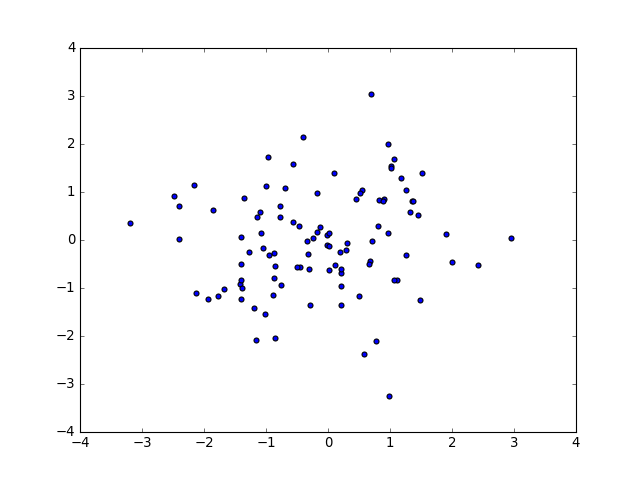

In [2]:
plt.scatter(np.random.randn(100), np.random.randn(100));

## Built-in Functionality

The very first thing to notice here, is that our figure looks a bit different. It now has some sort of title bar across its top, with what looks like a power button at its right edge, and along the bottom left edge, it now has a series of buttons. These buttons are where we will find the majority of the interactivity that the `NBAgg` backend provides, but let's ignore these right now, and instead just try mousing over the figure itself.

Notice, that as soon as the cursor enters the figure, a pair of x and y coordinates show up at the bottom right edge of our plot. This readout updates with every movement of the mouse allowing us to see the actual values of a particular data point in our graph by simply hovering over it. 

Now, let's move onto those buttons and see what they can do for us. As you mouse over the buttons, you'll see a description of what each button can do to the right, where the x and y coordinates were displayed before. Let's click on the fourth button in the group, the one with the cross in it. This is the pan and zoom button. Clicking on this one will allow you to click on an area of the graph and drag it around the screen (i.e., panning) and right-click (or, two-finger-click for Mac users) and drag to zoom in and out. Play around with the panning and zooming functionality a bit to get a feel for it.

The next button in the group, the one with the empty square, is the zoom to rectangle button. This mode allows you to draw a rectangle around an area of the graph that you want to zoom in on. Go ahead and give it a try now, to see how it works.

Now, that we've played around with our graph a bit, we may have left ourselves in a state that we don't want to be in. That's where the first three buttons come into play. We can use the second and third buttons to move back and forth through each view we've just created, just like you would with a web browser. And, the first button will reset the graph entirely.

Finally, the last button in the group, the one with the floppy disk---a device most of you probably haven't even seen in real life---is the save button, and clicking it will allow you to download a copy of the plot to your local hard drive.

Aside from that, the only thing left is that power button at the top. Clicking on that will turn off all of the interactive features of the plot. I'd be careful clicking on that one though. Once you click it, there's no going back without running the code in the cell again.

## Event Handling

Having the ability to pan and zoom is all well and good, but wouldn't it be great if you could respond to things like mouse clicks and key presses? Well, fortunately, you can through the extensive [events API][1] that matplotlib provides, and hooking your code into the event loop is super simple. Just call the [`mpl_connect`][2] method from the current figure's canvas object and pass in the name of an event and a callback function and you're all set up to handle that event. When the specified event occurs, your callback function will be called and it will be passed one of several [`matplotlib.backend_bases.Event`][3] objects specific to the type of event your callback function is handling.

### Handling Mouse Buttons Events

As an example of the events API in action, we're going to create a figure that will allow us to plot some random data by simply clicking on a point in the graph. Let's start by creating our callback function.

The code in the next cell creates a handler function that takes a `matplotlib.backend_bases.Event` object, specifically, an instance of the `matplotlib.backend_bases.MouseEvent` class, and will use the x and y coordinates where the user clicked to plot a handful of normally distributed, random data points. One thing to notice is that we check which button was clicked before plotting the points, and we only do so if the left mouse button was clicked, i.e., button 1.

[1]: http://matplotlib.org/users/event_handling.html
[2]: http://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.FigureCanvasBase.mpl_connect
[3]: http://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.Event

In [3]:
def button_press_handler(event):
    if event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

Then, we'll create a new `Figure` object, grab that figure's axes object, and use it to make a couple of changes to our plot. First, for purely aesthetic purposes, we'll turn on the grid lines for the plot. Then, and this is the most important piece, we'll turn off auto scaling. The reason for doing this is that, with auto scaling on, the graph will go nuts rescaling itself to fit all of our data points as tightly as possible. 

After that, we'll get the canvas object from our figure and call the `mpl_connect` method to register our callback function with the button press event.

Now, if we run the code below, we should get an empty plot that will allow us to add data points to it by picking a point around which our callback function will randomly place a small number of data points.

<IPython.core.display.Javascript object>


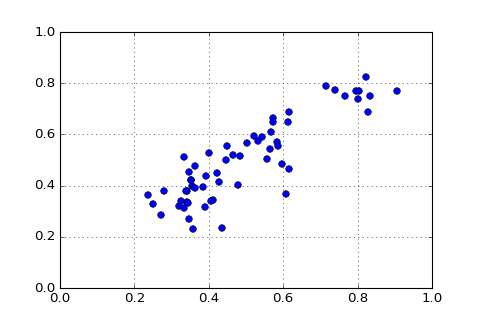

In [4]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself nearly every time we add a few more points.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)

plt.show(fig)

And, that's really all it takes to add a bit of event handling to our plots, but we're not done just yet.

### Ignoring Mouse Events Outside of Normal Mode

Though our button press event handler works fairly well, we do have one major problem with the figure above. If we click on one of the built-in interactivity buttons, like the pan and zoom, or zoom to rectangle buttons, and try to use the chosen functionality in our graph, it will work, but we'll also end up plotting some data points everywhere we click. What we really want is to ignore all clicks when anything other than normal mode is turned on. To do that, we'll need to grab a reference to the toolbar, so we can check what mode we're in. 

The following code is exactly the same event handler as above, but we added a few extra lines to prevent us from plotting points when using one of the built-in modes. On line 4, we get a reference to the toolbar from the current figure manager. Then, on line 5, if anything other than normal mode (i.e., no mode) is selected, we simply exit the handler, otherwise, we plot some data points.

In [4]:
def button_press_handler(event):
    # Get the toolbar and make sure that we are not in zoom or pan mode. 
    # If we are, just exit without doing anything
    toolbar = plt.get_current_fig_manager().toolbar
    if toolbar.mode != "":
        pass
    elif event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

So, we've now fixed our problem, but why not add one more bit of functionality while we're at it.

### Handling Key Press Events

In the next cell, we'll create another handler function, this time for key press events. In our handler, we'll check if the user has pressed the 'r' key (for regression), and if so, we'll gather all of the data points from the axes object, perform a linear regression on the data points, and plot the resultant line. 

In [5]:
def key_press_handler(event):
    if event.key.lower() == 'r':
        ax = plt.gca()
        xs = [x for l in ax.lines for x in l.get_xdata()]
        ys = [y for l in ax.lines for y in l.get_ydata()]
        m, b = np.polyfit(xs, ys, 1)
        xs = np.linspace(*plt.xlim(), num=2)
        plt.plot(xs, m*xs+b, 'r--')

Now, we just need to run the same code as we did above to create our plot, this time though, we'll connect both event handlers to their respective events. So, let's run it now and see how it works.

<IPython.core.display.Javascript object>


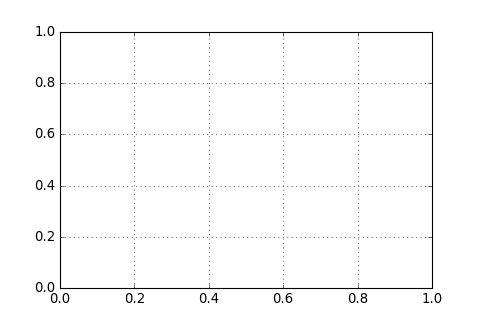

In [7]:
fig = plt.figure(figsize=(6, 4))

ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself with the first couple of points chosen.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)
fig.canvas.mpl_connect('key_press_event', key_press_handler)

plt.show(fig)

And, of course, you remembered to close all of the figures you've created along the way, right?

In [8]:
plt.close('all')

## Conclusion

And, that's going to bring us to the end. 

In this lesson, we learned about the default interactivity that matplotlib provides for us right out of the box. We learned how to use this functionality, as well as other forms of interactivity in a Jupyter notebook by passing the `notebook`, or `nbagg`, option to IPython's `matplotlib` magic command. And, finally, we learned about event handling and we created a sample plot that handled both key press, and mouse button press events. There's still quite a few more events that you can listen for, we've really only scratched the surface of what the events API has to offer, so I encourage you to read through the [documentation][1] to see what all is possible. 

[1]: http://matplotlib.org/users/event_handling.html